In [1]:
from pamod.base import Patient, Side, Tooth
from pamod.wrapper import BenchmarkWrapper, EvaluatorWrapper

wrapper = BenchmarkWrapper(
    task="pdgrouprevaluation",
    encodings=["one_hot"],
    learners=["xgb", "lr"],
    tuning_methods=["holdout"],
    hpo_methods=["hebo"],
    criteria=["macro_f1"],
    sampling=[None],
    n_configs=3,
    n_jobs=-1,
)

wrapper.baseline()

,Model,Encoding,Macro F1,Accuracy,Class F1 Scores,Multiclass Brier Score
0,Dummy Classifier,one_hot,0.309556,0.866835,"[0.9286682795841863, 0.0, 0.0]",0.118838
1,Logistic Regression,one_hot,0.523091,0.881427,"[0.9442239858906526, 0.3131976362442548, 0.311...",0.083658
2,Random Forest,one_hot,0.497956,0.878152,"[0.9407149323749692, 0.2928498118371536, 0.260...",0.085777


In [2]:
benchmark, learners = wrapper.wrapped_benchmark()

In [3]:
benchmark

,Task,Learner,Tuning,HPO,Criterion,Sampling,Factor,Macro F1,Accuracy,Class F1 Scores,Multiclass Brier Score
0,pdgrouprevaluation,xgb,holdout,hebo,macro_f1,None,None,0.5383,0.8802,"[0.9442029186165647, 0.31899061792300226, 0.35...",0.0848
1,pdgrouprevaluation,lr,holdout,hebo,macro_f1,None,None,0.5047,0.7753,"[0.8904820766378245, 0.2829409334985543, 0.340...",0.1600


In [4]:
evaluator = EvaluatorWrapper(
    learners_dict=learners,
    criterion="macro_f1",
    aggregate=True,
)

In [5]:
evaluator.average_over_splits()

,Task,Learner,Criterion,Sampling,Factor,Macro F1,Accuracy,Class F1 Scores,Multiclass Brier Score
0,pdgrouprevaluation,xgb,macro_f1,None,None,0.5286,0.8807,"[0.9428584523509516, 0.3020570033785612, 0.340...",0.0851


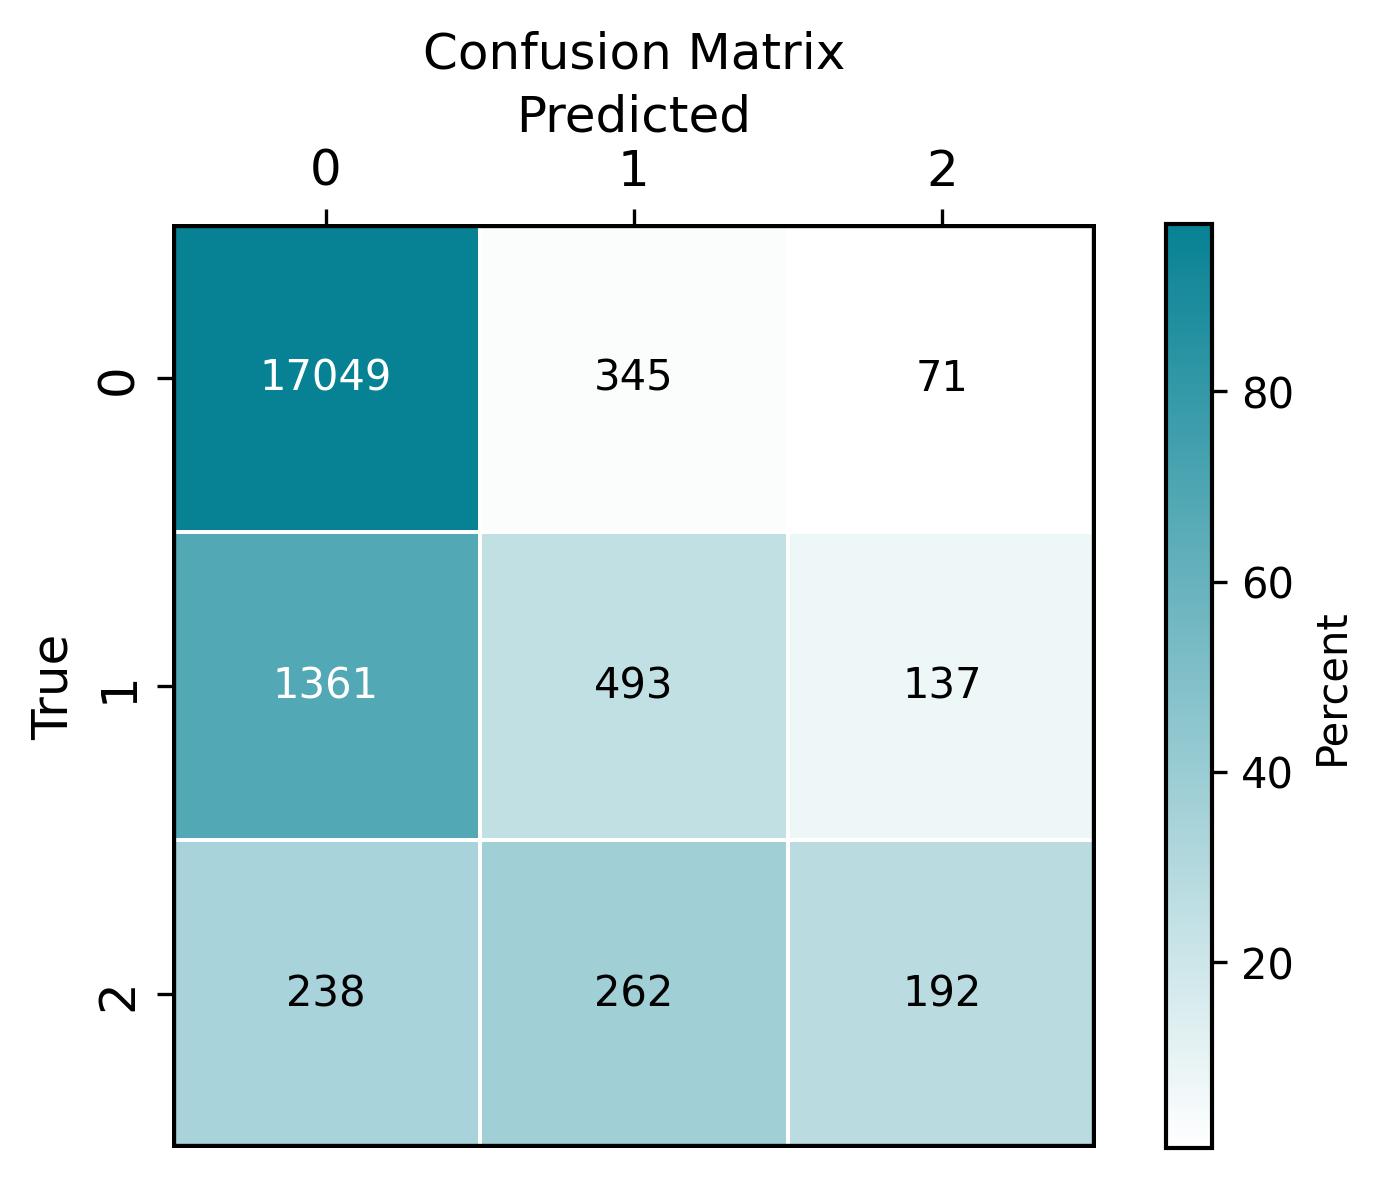

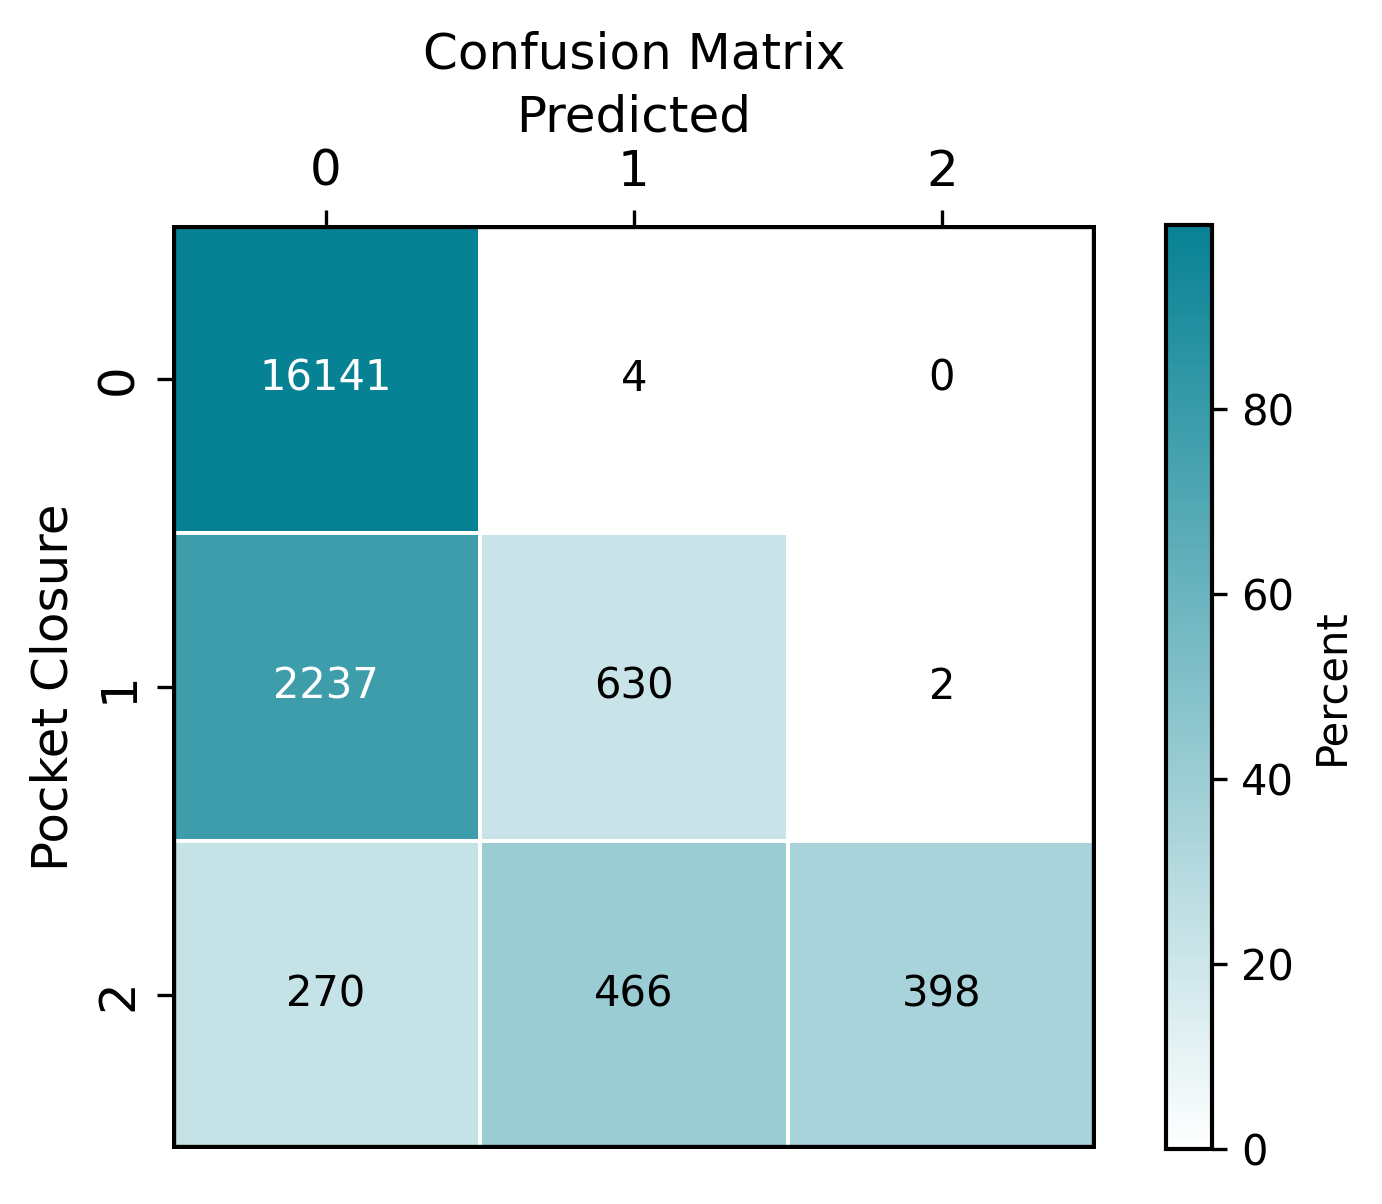

Average and Median Brier Scores by y:
   y      mean    median
0  0  0.015046  0.000295
1  1  0.331952  0.312017
2  2  0.311175  0.305826


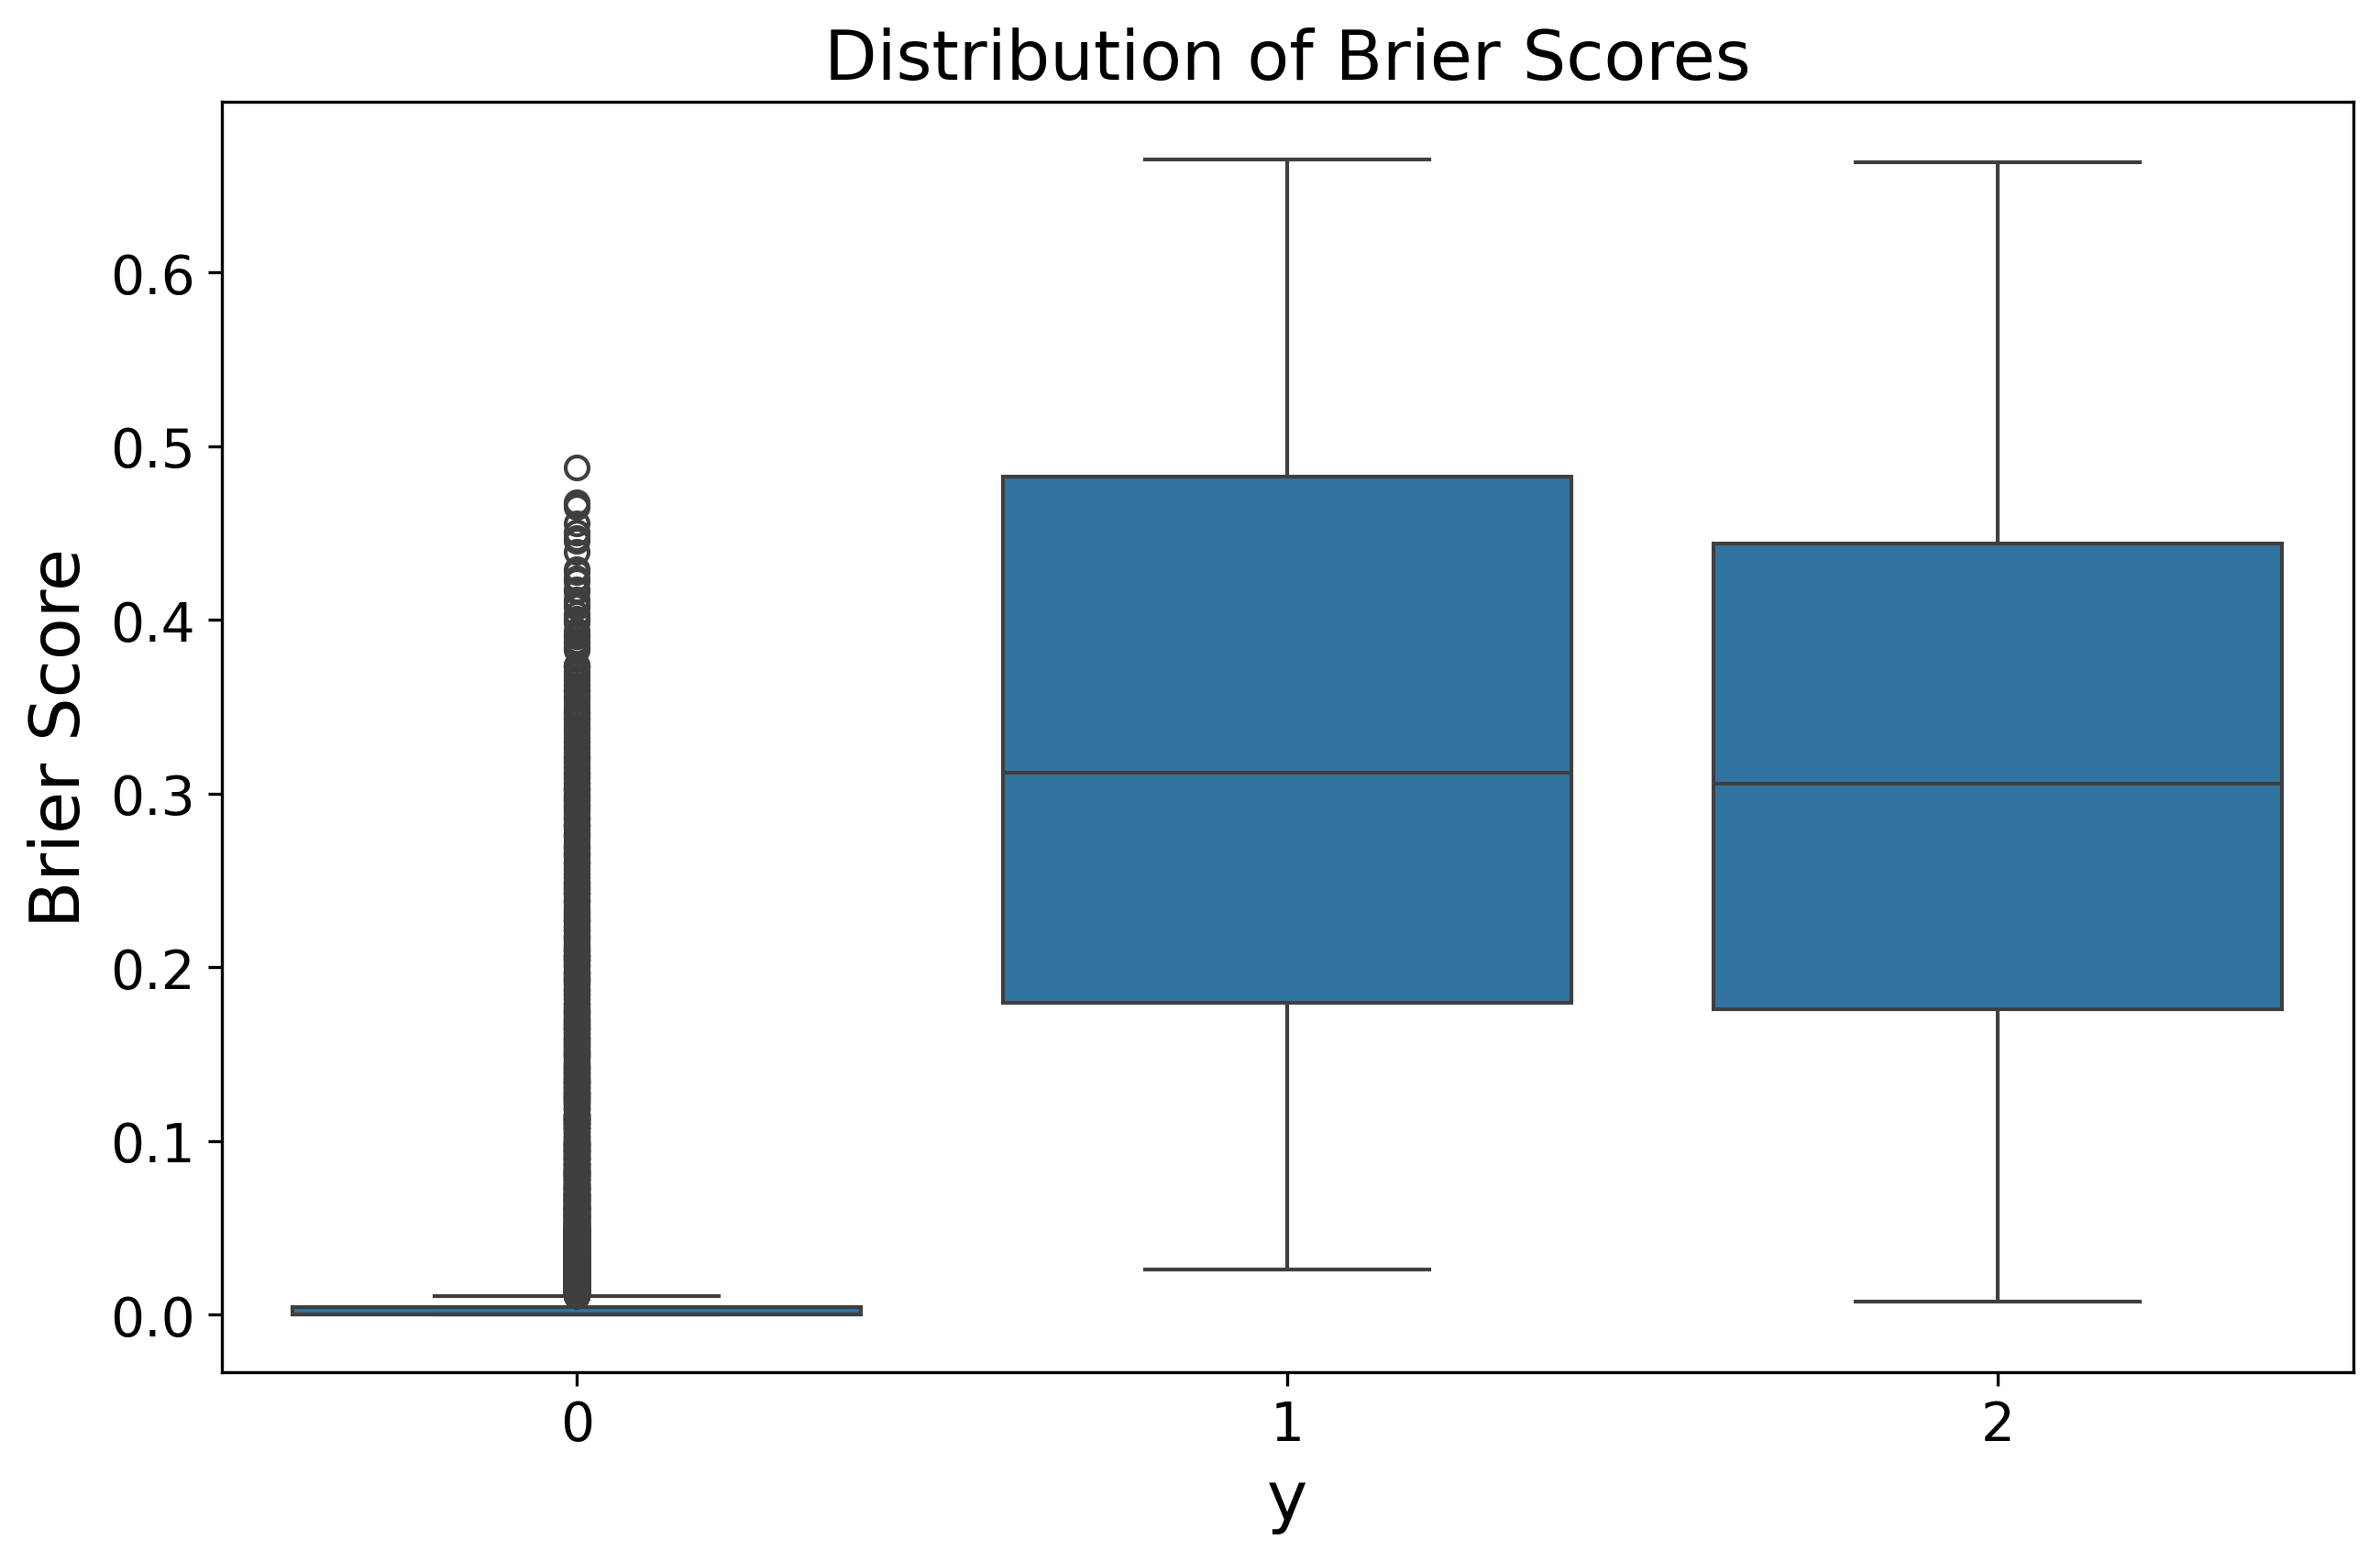


Mean Brier Score per cluster:
Cluster
0    0.071790
1    0.130152
2    0.095395
Name: Brier_Score, dtype: float64
Number of observations per cluster:
Cluster
0    15131
1     2768
2     2249
Name: count, dtype: int64


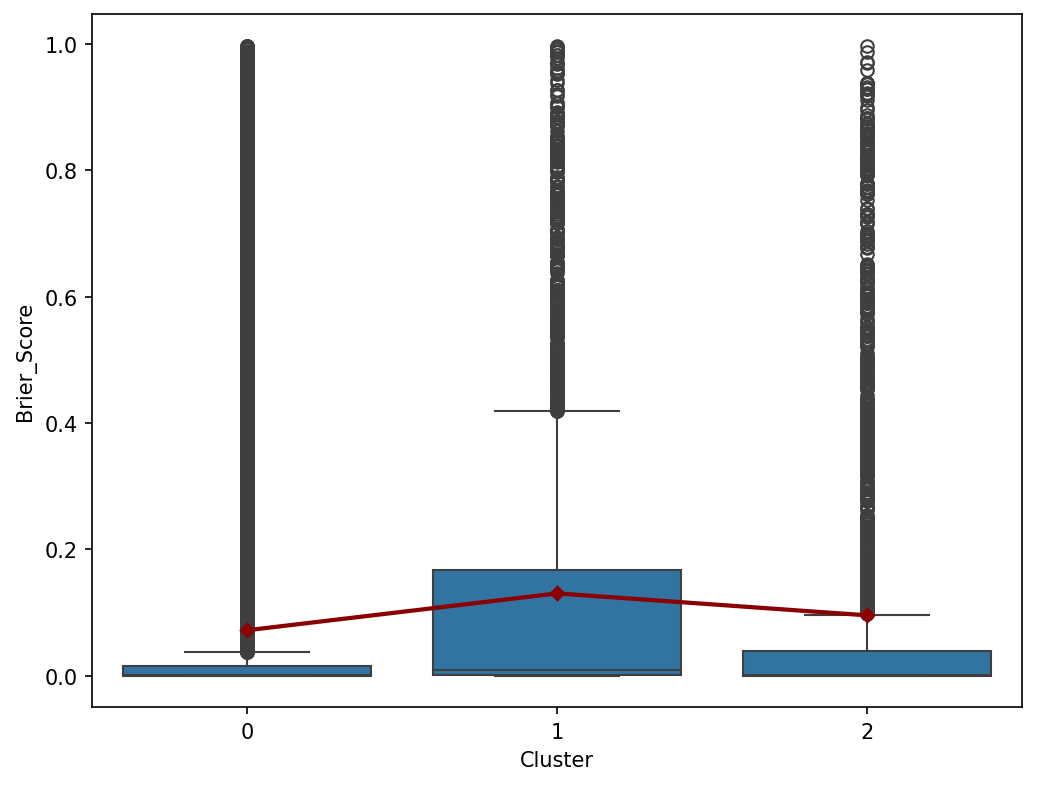

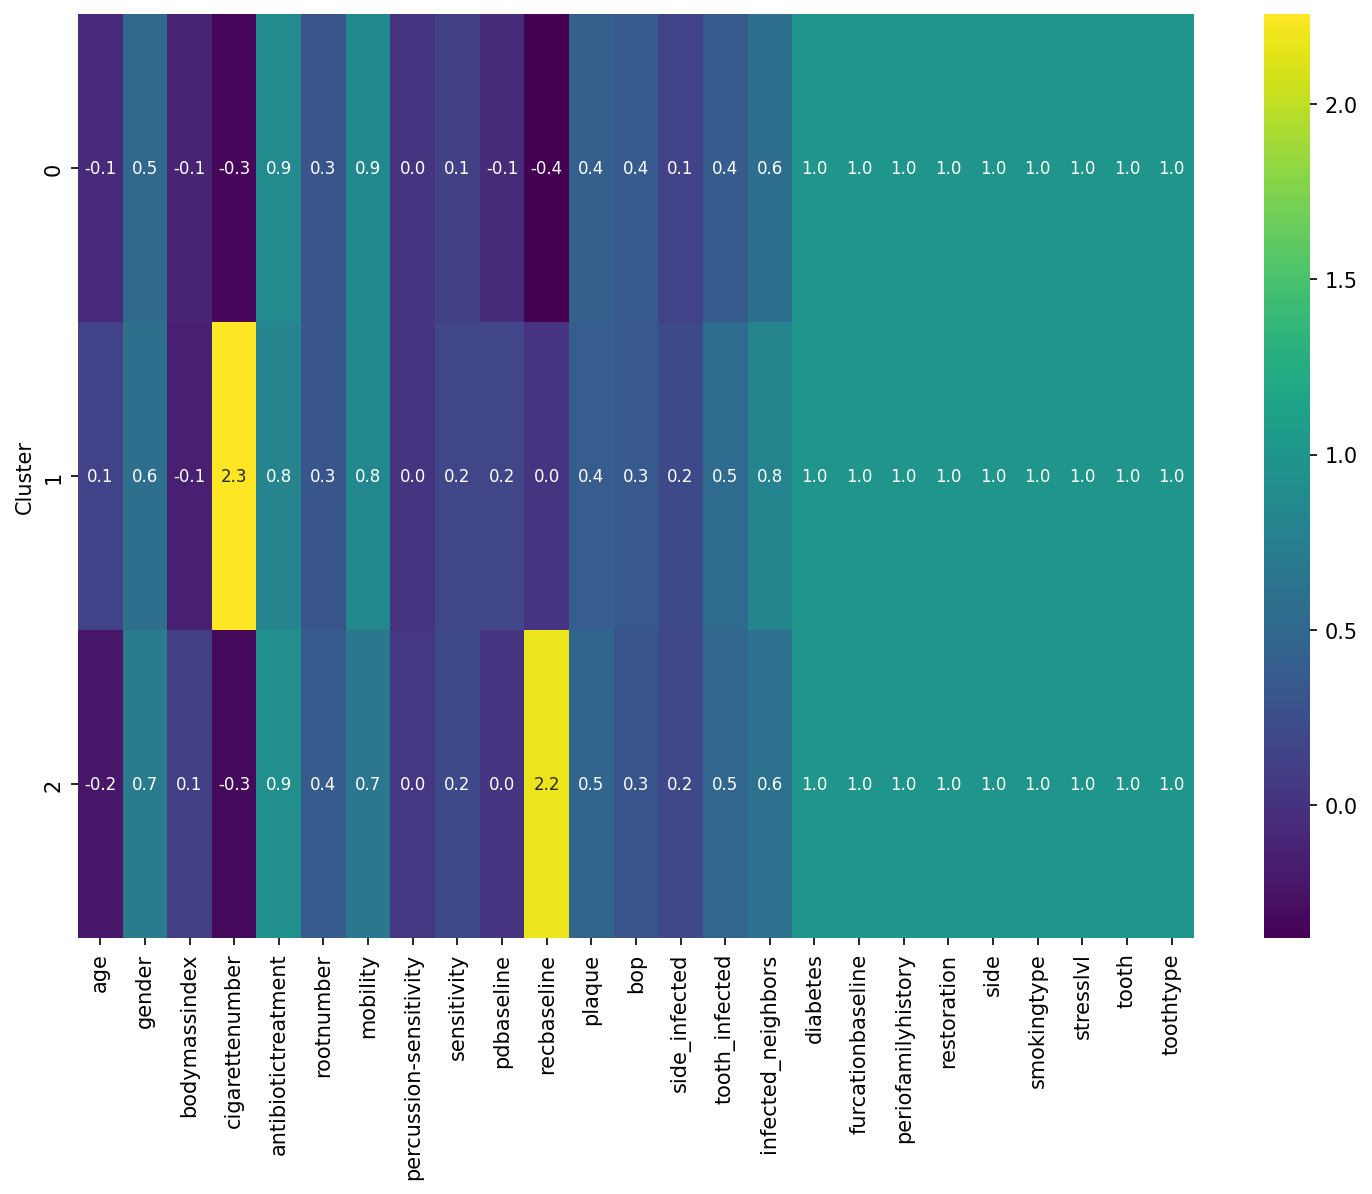

In [6]:
evaluator.wrapped_evaluation()

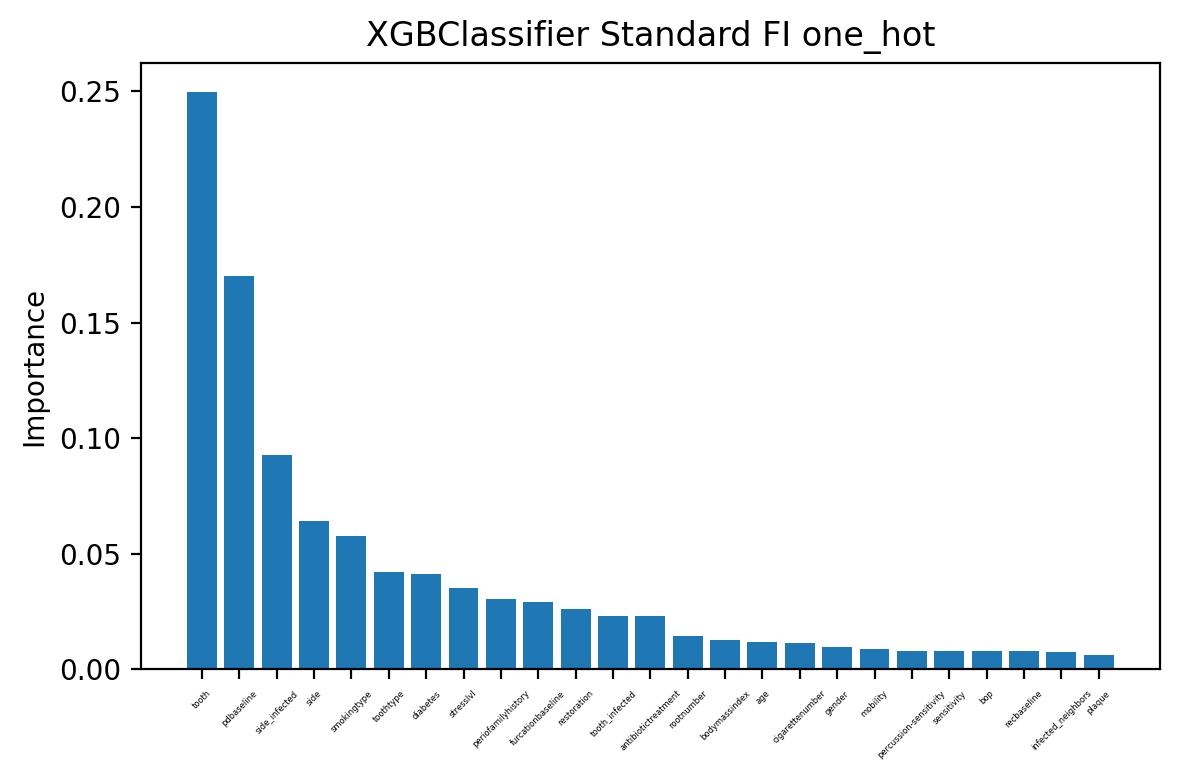

In [7]:
evaluator.evaluate_feature_importance(importance_types=["standard"])

In [8]:
patient = Patient(
    age=45,
    gender=1,
    bodymassindex=23.5,
    periofamilyhistory=1,
    diabetes=0,
    smokingtype=2,
    cigarettenumber=10,
    antibiotictreatment=0,
    stresslvl=2,
    teeth=[
        Tooth(
            tooth=11,
            toothtype=1,
            rootnumber=1,
            mobility=1,
            restoration=0,
            percussion=0,
            sensitivity=1,
            sides=[
                Side(
                    furcationbaseline=1,
                    side=1,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=2,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=3,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=1,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=4,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=5,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=6,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=0,
                    bop=1,
                ),  # noqa: E501
            ],
        ),
        Tooth(
            tooth=18,
            toothtype=3,
            rootnumber=2,
            mobility=0,
            restoration=1,
            percussion=1,
            sensitivity=0,
            sides=[
                Side(
                    furcationbaseline=3,
                    side=1,
                    pdbaseline=4,
                    recbaseline=5,
                    plaque=2,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=2,
                    pdbaseline=3,
                    recbaseline=3,
                    plaque=2,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=3,
                    pdbaseline=2,
                    recbaseline=2,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=1,
                    side=4,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=1,
                    bop=1,
                ),  # noqa: E501
                Side(
                    furcationbaseline=2,
                    side=5,
                    pdbaseline=5,
                    recbaseline=5,
                    plaque=0,
                    bop=0,
                ),  # noqa: E501
                Side(
                    furcationbaseline=3,
                    side=6,
                    pdbaseline=4,
                    recbaseline=4,
                    plaque=2,
                    bop=1,
                ),  # noqa: E501
            ],
        ),
    ],
)

_, output, results = evaluator.wrapped_patient_inference(patient)  # noqa: E501
output  # noqa: E501

,tooth,side,prediction,probability
0,11,1,0,0.977159
1,11,2,0,0.996926
2,11,3,0,0.982596
3,11,4,0,0.516401
4,11,5,0,0.992797
5,11,6,0,0.978367
6,18,1,1,0.726115
7,18,2,0,0.967754
8,18,3,0,0.921422
9,18,4,1,0.674066


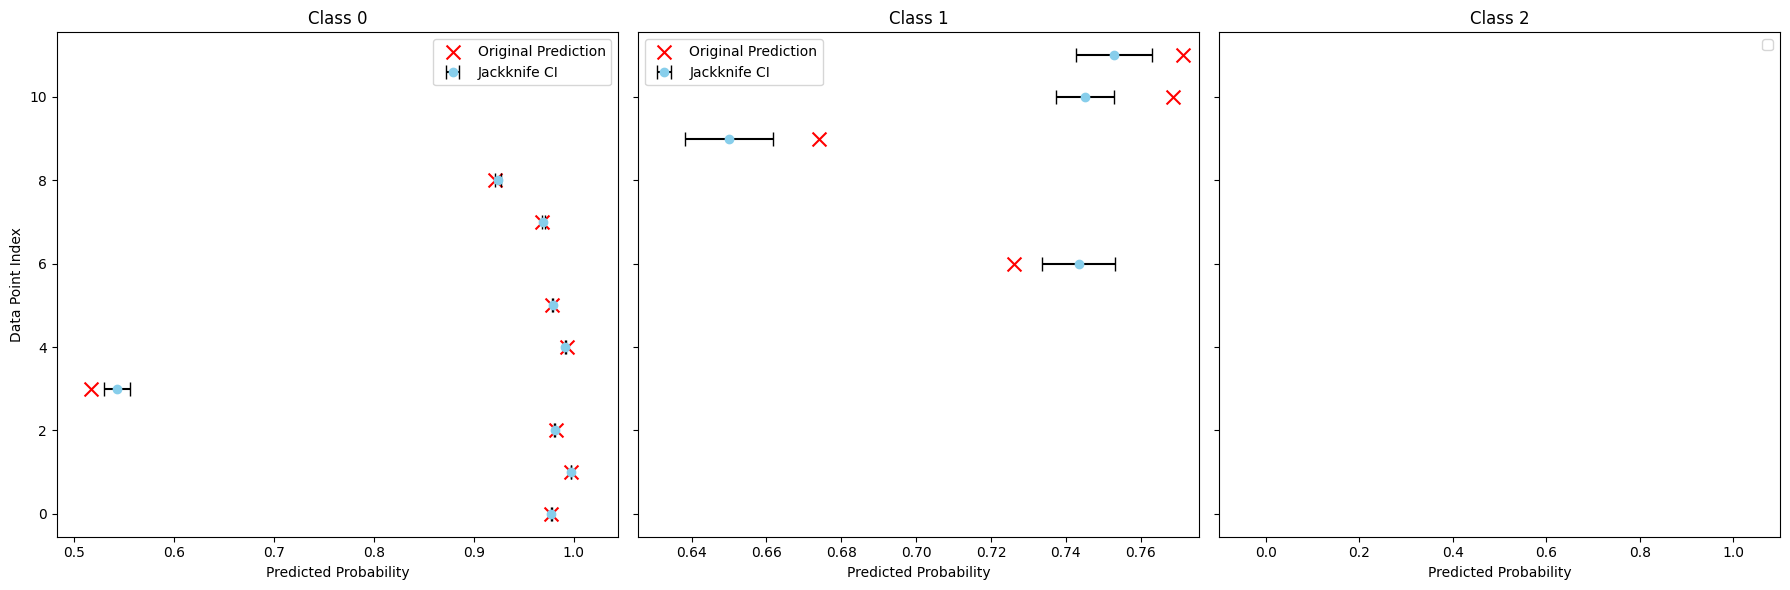

In [9]:
_, ci_plot = evaluator.wrapped_jackknife(patient, results, sample_fraction=0.1)